In [61]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [62]:
df_path = '../../data/whisper-medium-runs.csv'
df = pd.read_csv(df_path)
df.head()

,step,tag,value,experiment_name,lid_loss_alpha,LoRA,lang_prompt,train_lang_token,embedding_distance_regularization_type,distance_regularization_lambda
0,0,eval/fl_en-en_cer,0.070265,whisper-medium-tira-croatian,NaN,False,croatian,False,NaN,NaN
1,1000,eval/fl_en-en_cer,0.109744,whisper-medium-tira-croatian,NaN,False,croatian,False,NaN,NaN
2,2000,eval/fl_en-en_cer,0.163511,whisper-medium-tira-croatian,NaN,False,croatian,False,NaN,NaN
3,3000,eval/fl_en-en_cer,0.116702,whisper-medium-tira-croatian,NaN,False,croatian,False,NaN,NaN
4,4000,eval/fl_en-en_cer,0.163945,whisper-medium-tira-croatian,NaN,False,croatian,False,NaN,NaN


In [63]:
# get more detailed colnames
get_metric = lambda s: 'cer' if s.endswith('cer') else 'wer' if s.endswith('wer') else ''
df['metric']=df['tag'].apply(get_metric)
df['metric'].value_counts()

metric
       17240
cer     2856
wer     2856
Name: count, dtype: int64

In [64]:
unique_datasets = ['fl_en', 'HH20210312', 'HH20210913', 'tira-clean-split']

def get_dataset(s):
    for dataset in unique_datasets:
        if dataset in s:
            return dataset


df['dataset']=df['tag'].apply(get_dataset)
df['dataset'].value_counts()

dataset
fl_en               5040
tira-clean-split    5040
HH20210312          3528
HH20210913          3528
Name: count, dtype: int64

In [65]:
# so we can compare no LID loss to using LID loss
df['lid_loss_alpha']=df['lid_loss_alpha'].fillna(0)

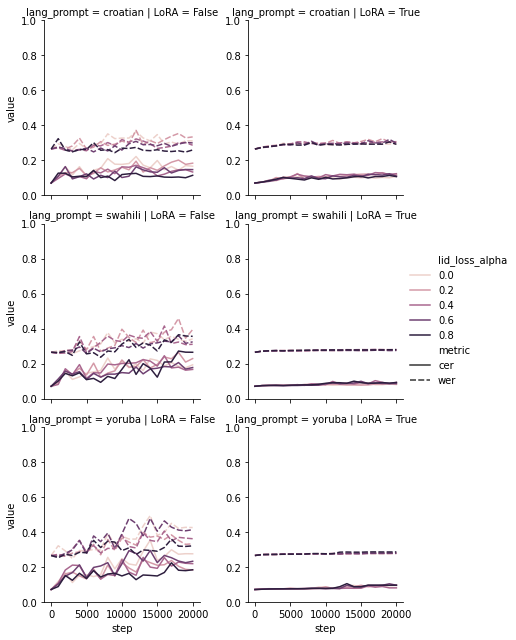

In [66]:
g = sb.FacetGrid(
    df[
        (df['dataset']=='fl_en') &
        (df['metric']!='') &
        (df['lang_prompt'].isin(['yoruba', 'swahili', 'croatian']))
    ],
    col='LoRA',
    row='lang_prompt',
    # hue='lid_loss_alpha',
    sharey=False,
)
g.map_dataframe(
    sb.lineplot,
    x='step',
    y='value',
    hue='lid_loss_alpha',
    errorbar=None,
    legend='full',
    style='metric',
)
g.add_legend()
# g.set_title('Performance on English while decoding as Yoruba')
g.set(ylim=(0,1))
plt.show()

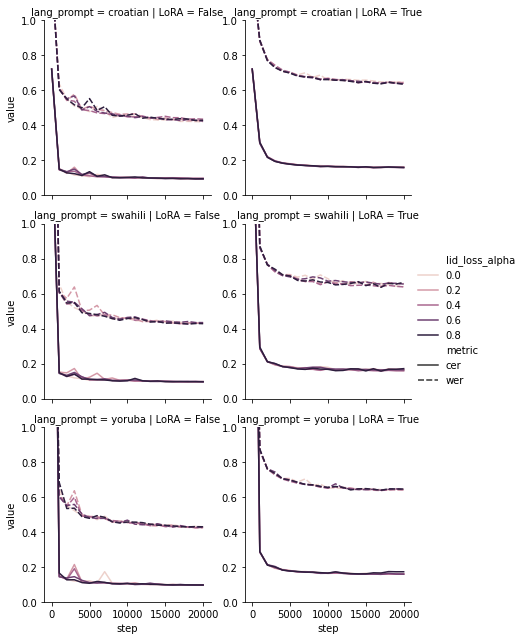

In [67]:
g = sb.FacetGrid(
    df[
        (df['dataset']=='tira-clean-split') &
        (df['metric']!='') &
        (df['lang_prompt'].isin(['yoruba', 'swahili', 'croatian']))
    ],
    col='LoRA',
    row='lang_prompt',
    # hue='lid_loss_alpha',
    sharey=False,
)
g.map_dataframe(
    sb.lineplot,
    x='step',
    y='value',
    hue='lid_loss_alpha',
    errorbar=None,
    legend='full',
    style='metric',
)
g.add_legend()
# g.set_title('Performance on English while decoding as Yoruba')
g.set(ylim=(0,1))
plt.show()

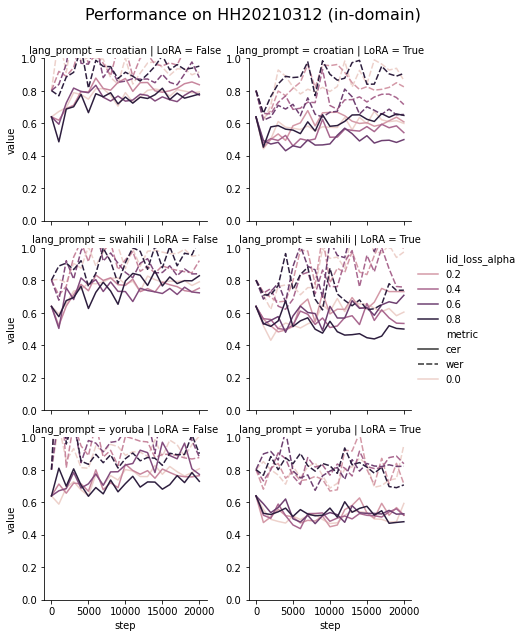

In [68]:
g = sb.FacetGrid(
    df[
        (df['dataset']=='HH20210312') &
        (df['metric']!='') &
        (df['lang_prompt'].isin(['yoruba', 'swahili', 'croatian']))
    ],
    col='LoRA',
    row='lang_prompt',
    # hue='lid_loss_alpha',
    sharey=False,
)
g.map_dataframe(
    sb.lineplot,
    x='step',
    y='value',
    hue='lid_loss_alpha',
    errorbar=None,
    legend='full',
    style='metric',
)
g.add_legend()
g.set(ylim=(0,1))
g.figure.suptitle('Performance on HH20210312 (in-domain)', size=16)
g.figure.subplots_adjust(top=.9)
plt.show()

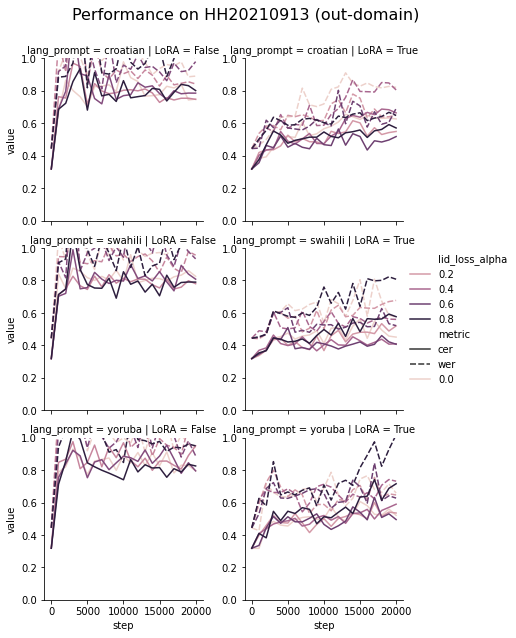

In [69]:
g = sb.FacetGrid(
    df[
        (df['dataset']=='HH20210913') &
        (df['metric']!='') &
        (df['lang_prompt'].isin(['yoruba', 'swahili', 'croatian']))
    ],
    col='LoRA',
    row='lang_prompt',
    # hue='lid_loss_alpha',
    sharey=False,
)
g.map_dataframe(
    sb.lineplot,
    x='step',
    y='value',
    hue='lid_loss_alpha',
    errorbar=None,
    legend='full',
    style='metric',
)
g.add_legend()
g.set(ylim=(0,1))
g.figure.suptitle('Performance on HH20210913 (out-domain)', size=16)
g.figure.subplots_adjust(top=.9)
plt.show()

In [106]:
df.loc[(df['tag']=='train/train_runtime')&df['LoRA'], 'value'].mean(), df.loc[(df['tag']=='train/train_runtime')&~df['LoRA'], 'value'].mean()

(43131.22607421875, 46769.92626953125)

# Langtoken experiments

In [77]:
df.loc[~df['embedding_distance_regularization_type'].isna(), 'dataset'].value_counts()


dataset
fl_en               1008
tira-clean-split    1008
Name: count, dtype: int64

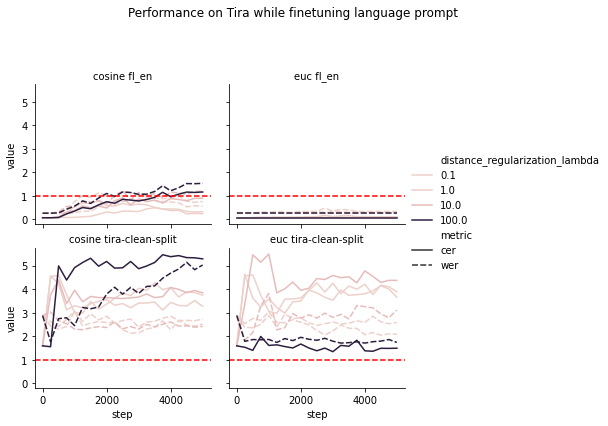

In [96]:
g=sb.FacetGrid(
    df[
        (df['dataset'].isin(['tira-clean-split', 'fl_en'])) &
        (df['embedding_distance_regularization_type']!='') &
        (df['metric']!='')
    ],
    col='embedding_distance_regularization_type',
    row='dataset'
)
g.map_dataframe(
    sb.lineplot,
    x='step',
    y='value',
    hue='distance_regularization_lambda',
    errorbar=None,
    style='metric',
)
g.map(plt.axhline, y=1, color='red', linestyle='--')
g.set_titles('{col_name} {row_name}')
g.add_legend()
g.figure.suptitle('Performance on Tira while finetuning language prompt')
g.figure.subplots_adjust(top=.8)

Text(0.5, 1.0, 'Performance on Tira while finetuning language prompt')

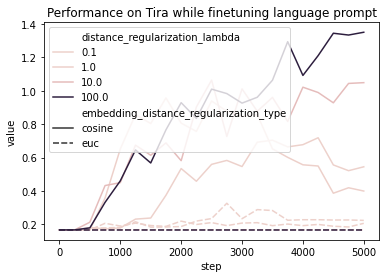

In [81]:
ax=sb.lineplot(
    df[
        (df['dataset']=='fl_en') &
        (df['embedding_distance_regularization_type']!='') &
        (df['metric']!='')
    ],
    x='step',
    y='value',
    hue='distance_regularization_lambda',
    errorbar=None,
    style='embedding_distance_regularization_type',
)
# ax.set(ylim=(0, 6))
ax.set_title('Performance on Tira while finetuning language prompt')